In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [2]:
fraud=pd.read_csv('D:\\Data Science\\Assignments\\Assignment 14 (Decision Trees)\\Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud=fraud.rename(columns={'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'})
fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraud['Income_range']=np.where(fraud['Taxable_Income']>=30000,'Good','Risky')
fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Income_range
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [6]:
fraud_data=pd.get_dummies(fraud.iloc[:,:6])
fraud_data

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [8]:
fd=fraud_data.drop(columns={'Taxable_Income'},axis=1)
fd

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [9]:
fd1=pd.concat([fraud['Income_range'],fd],axis=1)
fd1

,Income_range,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [10]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
fd_norm = norm_func(fd1.iloc[:,1:])
fd_norm.tail(10)

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
590,0.341473,0.466667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
591,0.615406,0.600000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
592,0.283703,0.533333,0.0,1.0,0.0,0.0,1.0,1.0,0.0
593,0.610256,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0
594,0.412341,0.300000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
595,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0
599,0.760683,0.533333,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
X = fd1.iloc[:,1:]

In [15]:
X

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [16]:
Y=fd1['Income_range']
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Income_range, Length: 600, dtype: object

In [17]:
colnames = list(X.columns)
colnames

['City_Population',
 'Work_Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Urban_NO',
 'Urban_YES']

In [18]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=2)

In [19]:
#Build Model
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

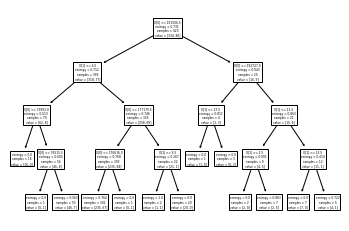

In [20]:
tree.plot_tree(model);

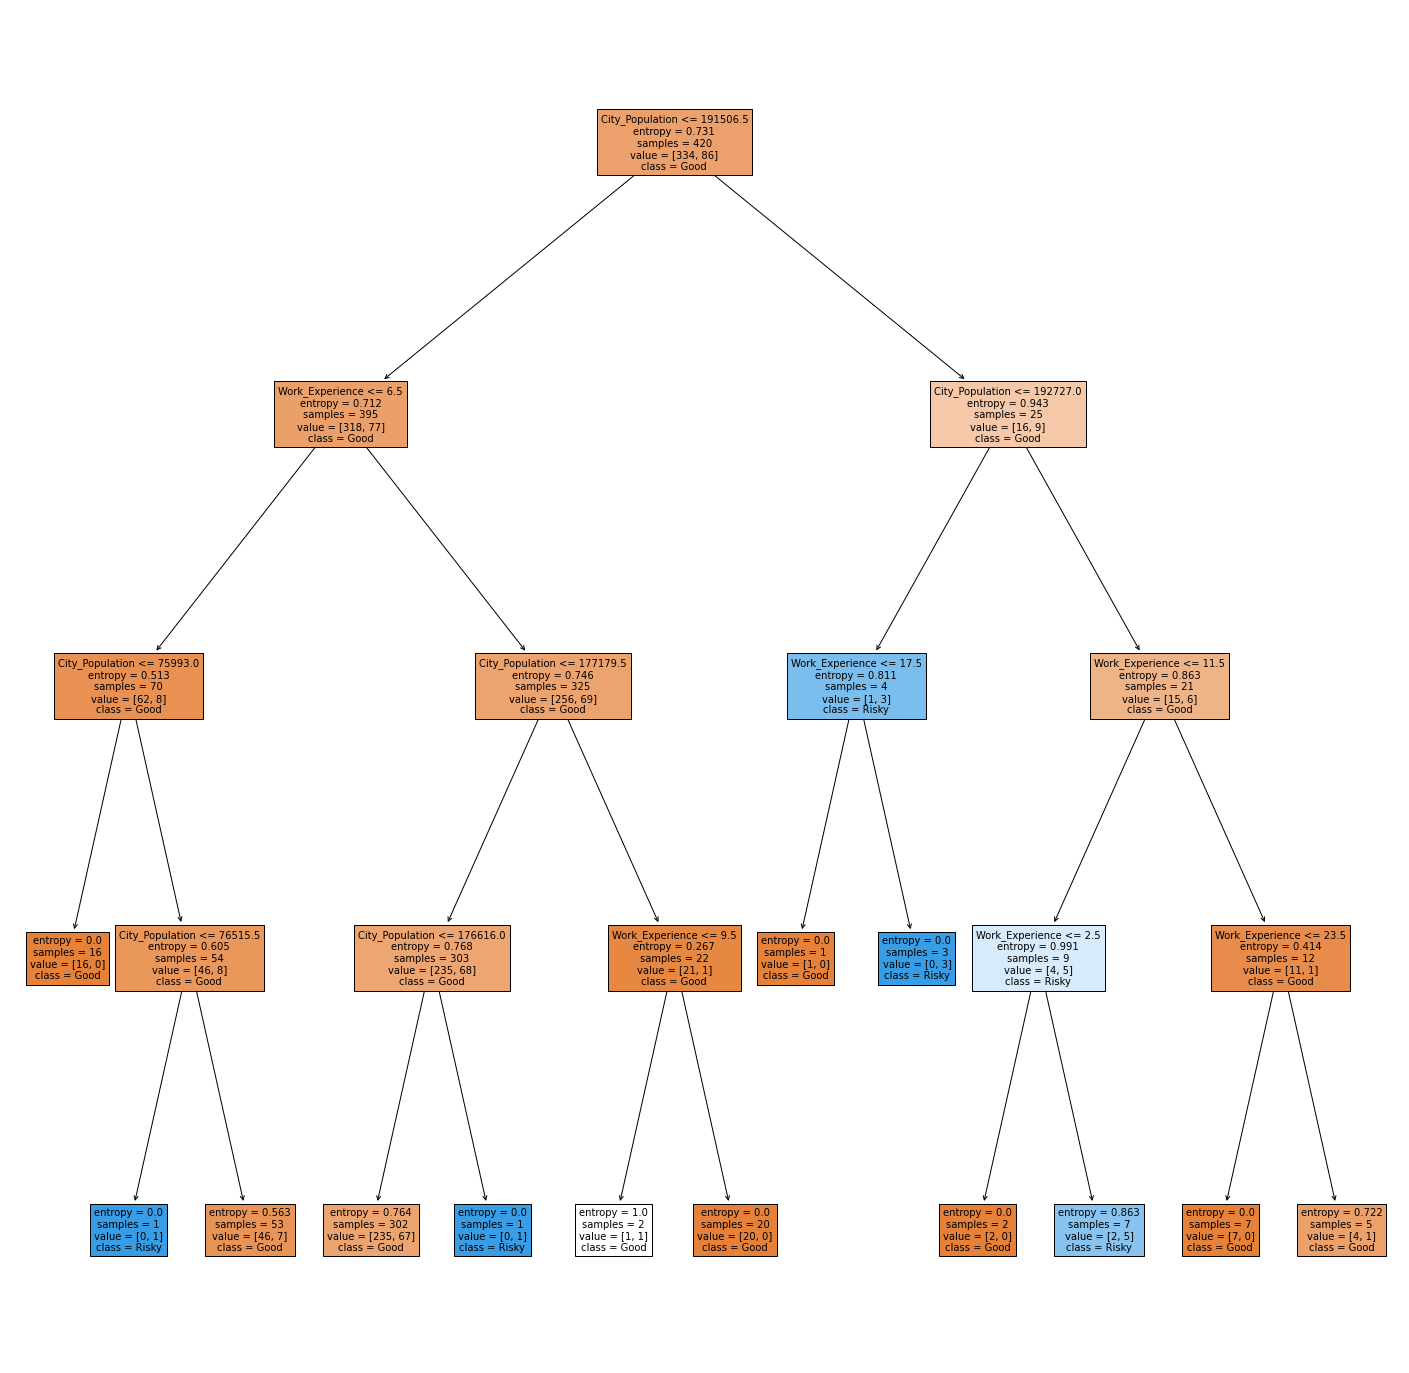

In [21]:
fig, axes = plt.subplots(figsize = (25,25))
fn=['City_Population',
 'Work_Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Urban_NO',
 'Urban_YES']
cn=['Good','Risky']

tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True,
               fontsize=10);

In [22]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts()

Good     179
Risky      1
dtype: int64

In [23]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [24]:
Y_test

449     Good
141     Good
131     Good
311     Good
176     Good
       ...  
548     Good
15      Good
465    Risky
307     Good
322     Good
Name: Income_range, Length: 180, dtype: object

In [25]:
pd.crosstab(Y_test,preds)

col_0,Good,Risky
Income_range,,
Good,141,1
Risky,38,0


In [26]:
np.mean(preds==Y_test)

0.7833333333333333

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.7833333333333333

In [29]:
#bagging
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100

In [30]:
Bagging_model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
Bagging_model.fit(X_train,Y_train)
results = cross_val_score(Bagging_model, X_train, Y_train, cv=kfold)
print(results.mean())

0.7452380952380953


In [32]:
Bagging_preds = Bagging_model.predict(X_test)
pd.crosstab(Y_test,Bagging_preds)

col_0,Good,Risky
Income_range,,
Good,132,10
Risky,38,0


In [33]:
np.mean(Bagging_preds==Y_test)

0.7333333333333333

In [34]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
Random_forest_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model.fit(X_train,Y_train)

RandomForestClassifier(max_features=3)

In [35]:
Random_forest_results = cross_val_score(Random_forest_model, X_train, Y_train, cv=kfold)
print(Random_forest_results.mean())

0.7380952380952381


In [36]:
Random_forest_preds = Random_forest_model.predict(X_test)
pd.crosstab(Y_test,Random_forest_preds)

col_0,Good,Risky
Income_range,,
Good,132,10
Risky,38,0


In [37]:
np.mean(Random_forest_preds==Y_test)

0.7333333333333333

In [38]:
#ADA Boost
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10)
AdaBoost_model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
AdaBoost_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=10, random_state=7)

In [39]:
AdaBoost_results = cross_val_score(AdaBoost_model, X_train, Y_train, cv=kfold)
print(AdaBoost_results.mean())

0.7833333333333333


In [40]:
AdaBoost_preds = AdaBoost_model.predict(X_test)
pd.crosstab(Y_test,AdaBoost_preds)

col_0,Good
Income_range,
Good,142
Risky,38


In [41]:
np.mean(Random_forest_preds==Y_test)

0.7333333333333333